In [2]:
#Подключаю библиотеки
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [3]:
#Задаю аппроксимирующие функции
def func(x, a, b, c):
    return a/(1 + b*np.exp(-c * x))
def func1(x, a, b, c, d):
    return a/(1+b*np.exp(-c * x))**(1/d)

In [4]:
#Задаю  начальные данные
xdata = np.arange(1,16,1)
ydata = [16.08,33.83,65.80,97.20,191.55,326.20,386.87,520.53,590.03,651.92,724.93,699.56,689.96,637.56,717.41]

In [6]:
#кёрв фит возвращает два массива, поэтому присваивать надо двум переменным, первая-неизвестные коэффициенты а, б, с, вторая- неважно, не используется
popt, pcov = curve_fit(func, xdata, ydata)
popt1, pcov1 = curve_fit(func1, xdata, ydata)
print(pcov1)

[[ 2.65784873e+02 -3.81195809e+03 -2.02608082e+00 -5.87427199e+00]
 [-3.81195809e+03  1.66109493e+05  7.87563724e+01  2.74923076e+02]
 [-2.02608082e+00  7.87563724e+01  3.82754130e-02  1.26967287e-01]
 [-5.87427199e+00  2.74923076e+02  1.26967287e-01  4.72733643e-01]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


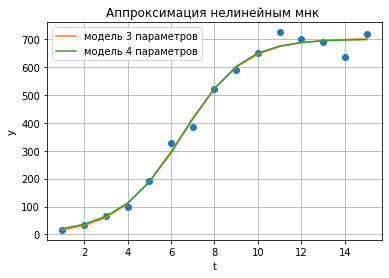

In [31]:
#Рисуем

plt.plot(xdata,ydata, 'o')
plt.title('Аппроксимация нелинейным мнк ')
plt.plot(xdata, func(xdata, *popt), label = 'модель 3 параметров')
plt.plot(xdata, func1(xdata, *popt1), label = 'модель 4 параметров')
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.legend()

In [9]:
#манхетеннская норма-суммирую модули разностей в узлах
sum(np.abs(func(xdata, *popt)-ydata))

245.76407615395425

In [10]:
#чебышевская норма
max(np.abs(func(xdata, *popt)-ydata))

61.44522601096048

In [12]:
#Норма фробениуса через встроенную функцию
np.linalg.norm(ydata-func(xdata, *popt))

94.49805803644861